#### Comparing 3 types of clustering:
    1. K-means clustering -> groups data points into k clusters, where k is a user-defined parameter
    2. DBSCAN clustering -> density-based clustering algorithm that groups data points that are densely connected together
    3. Hierarhical clustering -> recurvsive clustering algorithm that builds tree-like structure of clusters
    
#### Evaluating clustering methods
    1. Davies-Bouldin Index -> average similarity measure of each cluster with its most similar cluster, where similarity is the ratio of within-cluster distances to between-cluster distances. Clusters further apart and less dispersed will have lower values, indicating better clustering
    2. Sihoulette coefficient -> score near 1 signifies best importance that the data point is very compact within the cluster it belongs and far away from the other clusters, -1 signifies worst importance of data point. Score near 0 signifies overlapping clusters

In [1]:
# import relevant library
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker

In [2]:
# read csv file
url = "transformed_df_features2.csv"
HDB_resale_df = pd.read_csv(url)

In [3]:
HDB_resale_df

,month,town,flat_type,block,street_name,storey_range,floor_area_sqm,flat_model,lease_commence_date,remaining_lease,...,postal_code,sector_code,distance_from_CBD,nearest_station,nearest_station_distance,nearest_mall,nearest_mall_distance,adjusted_price_per_sqm,storey_avg,remaining_months
0,2017-01,ANG MO KIO,2 ROOM,406,ANG MO KIO AVE 10,10 TO 12,44.0,Improved,1979,61 years 04 months,...,560406,56,8.685298,Ang Mo Kio,0.960938,AMK Hub,1.017286,6619.458211,11,736
1,2017-01,ANG MO KIO,3 ROOM,108,ANG MO KIO AVE 4,01 TO 03,67.0,New Generation,1978,60 years 07 months,...,560108,56,9.789287,Mayflower,0.189871,Broadway Plaza,0.867983,4684.382419,2,727
2,2017-01,ANG MO KIO,3 ROOM,602,ANG MO KIO AVE 5,01 TO 03,67.0,New Generation,1980,62 years 05 months,...,560602,56,10.908694,Lentor,0.535118,Broadway Plaza,1.528024,4909.232776,2,749
3,2017-01,ANG MO KIO,3 ROOM,465,ANG MO KIO AVE 10,04 TO 06,68.0,New Generation,1980,62 years 01 month,...,560465,56,9.169984,Ang Mo Kio,0.932844,myVillage At Serangoon Garden,0.892900,4892.424109,5,745
4,2017-01,ANG MO KIO,3 ROOM,601,ANG MO KIO AVE 5,01 TO 03,67.0,New Generation,1980,62 years 05 months,...,560601,56,10.949497,Lentor,0.501153,Broadway Plaza,1.571906,4965.445364,2,749
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
142417,2022-02,YISHUN,MULTI-GENERATION,633,YISHUN ST 61,04 TO 06,171.0,Multi Generation,1987,64 years 11 months,...,760633,76,15.036277,Khatib,0.775855,Wisteria Mall,0.180017,5189.470018,5,779
142418,2022-02,YISHUN,MULTI-GENERATION,632,YISHUN ST 61,10 TO 12,164.0,Multi Generation,1987,64 years 09 months,...,760632,76,15.032721,Khatib,0.702424,Wisteria Mall,0.245374,5430.250784,11,777
142419,2022-05,YISHUN,MULTI-GENERATION,605,YISHUN ST 61,04 TO 06,163.0,Multi Generation,1988,64 years 09 months,...,760605,76,15.413881,Khatib,0.610240,Northpoint City,0.687057,5423.859379,5,777
142420,2022-09,YISHUN,MULTI-GENERATION,633,YISHUN ST 61,10 TO 12,164.0,Multi Generation,1987,64 years 04 months,...,760633,76,15.036277,Khatib,0.775855,Wisteria Mall,0.180017,5365.853659,11,772


Based on our EDA, we recognized that each sector code has their own unique set of characteristics that makes it difficult to perform clustering across all 140k flats. Therefore, we would need to perform clustering in each individual sector code. To test clustering, we'll first use sector code 56: Ang Mo Kio 

In [4]:
HDB_sector_code_56_df = HDB_resale_df[HDB_resale_df['sector_code'] == "56"]

In [5]:
HDB_sector_code_56_df

,month,town,flat_type,block,street_name,storey_range,floor_area_sqm,flat_model,lease_commence_date,remaining_lease,...,postal_code,sector_code,distance_from_CBD,nearest_station,nearest_station_distance,nearest_mall,nearest_mall_distance,adjusted_price_per_sqm,storey_avg,remaining_months
0,2017-01,ANG MO KIO,2 ROOM,406,ANG MO KIO AVE 10,10 TO 12,44.0,Improved,1979,61 years 04 months,...,560406,56,8.685298,Ang Mo Kio,0.960938,AMK Hub,1.017286,6619.458211,11,736
1,2017-01,ANG MO KIO,3 ROOM,108,ANG MO KIO AVE 4,01 TO 03,67.0,New Generation,1978,60 years 07 months,...,560108,56,9.789287,Mayflower,0.189871,Broadway Plaza,0.867983,4684.382419,2,727
2,2017-01,ANG MO KIO,3 ROOM,602,ANG MO KIO AVE 5,01 TO 03,67.0,New Generation,1980,62 years 05 months,...,560602,56,10.908694,Lentor,0.535118,Broadway Plaza,1.528024,4909.232776,2,749
3,2017-01,ANG MO KIO,3 ROOM,465,ANG MO KIO AVE 10,04 TO 06,68.0,New Generation,1980,62 years 01 month,...,560465,56,9.169984,Ang Mo Kio,0.932844,myVillage At Serangoon Garden,0.892900,4892.424109,5,745
4,2017-01,ANG MO KIO,3 ROOM,601,ANG MO KIO AVE 5,01 TO 03,67.0,New Generation,1980,62 years 05 months,...,560601,56,10.949497,Lentor,0.501153,Broadway Plaza,1.571906,4965.445364,2,749
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
117666,2022-08,ANG MO KIO,EXECUTIVE,613,ANG MO KIO AVE 4,04 TO 06,149.0,Apartment,1996,72 years 10 months,...,560613,56,10.597248,Yio Chu Kang,0.727962,Broadway Plaza,1.035896,6174.496644,5,874
117667,2022-10,ANG MO KIO,EXECUTIVE,614,ANG MO KIO AVE 4,07 TO 09,149.0,Apartment,1996,72 years 08 months,...,560614,56,10.544589,Yio Chu Kang,0.763189,Broadway Plaza,1.004970,7382.550336,8,872
117668,2022-08,ANG MO KIO,EXECUTIVE,533,ANG MO KIO AVE 5,01 TO 03,149.0,Adjoined flat,1980,56 years 07 months,...,560533,56,10.035255,Ang Mo Kio,0.658269,Jubilee Square,0.632316,5771.812081,2,679
117669,2022-04,ANG MO KIO,EXECUTIVE,504,ANG MO KIO AVE 8,07 TO 09,163.0,Adjoined flat,1980,57 years 05 months,...,560504,56,10.110655,Ang Mo Kio,0.602717,Jubilee Square,0.360208,6064.880666,8,689


<AxesSubplot:>

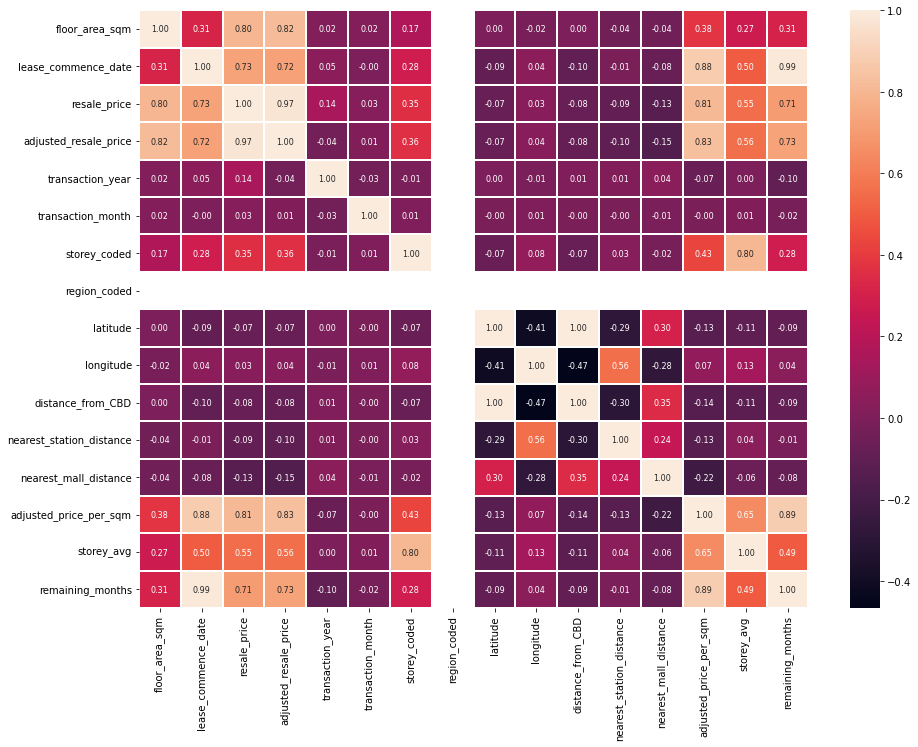

In [6]:
# Correlation plot
correlation = HDB_sector_code_56_df.corr()
plt.figure(figsize=(15,11))
sns.heatmap(correlation, xticklabels=correlation.columns, yticklabels=correlation.columns,annot=True,linewidths=2,annot_kws={"size":8},fmt=".2f")

In [7]:
HDB_sector_code_56_df.corr()[['adjusted_price_per_sqm']].sort_values(by='adjusted_price_per_sqm', ascending = False)


,adjusted_price_per_sqm
adjusted_price_per_sqm,1.000000
remaining_months,0.885264
lease_commence_date,0.877054
adjusted_resale_price,0.831583
resale_price,0.809466
storey_avg,0.649109
storey_coded,0.430817
floor_area_sqm,0.376827
longitude,0.071890
transaction_month,-0.004445


#### Features to use:
    - remaining_months
    - storey_avg
    - nearest_station_distance
    - distance_from_CBD
    - nearest_mall_distance

### KMeans

In [8]:
Clustering_HDB_sector_code_56_df = HDB_sector_code_56_df[['latitude', 'longitude']].copy()

C:\Users\elija\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\elija\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\elija\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\elija\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\elija\anaconda3\lib\site-packages\sklearn\clust

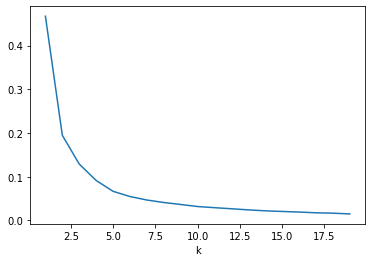

In [9]:
import numpy as np
from sklearn.cluster import KMeans

#Load dataset
data = Clustering_HDB_sector_code_56_df

# Initialize KMeans
kmeans = KMeans(n_clusters=20)

# Fit KMeans to the data
kmeans.fit(data)

# Calculate the WCSS for a range of values of k
wcss = []
for i in range(1, 20):
    kmeans = KMeans(n_clusters=i, random_state=0)
    kmeans.fit(data)
    wcss.append(kmeans.inertia_)

# Plot the WCSS against k
plt.plot(range(1, 20), wcss)
plt.xlabel("k")
plt.show()

In [10]:
# Select the features
features = Clustering_HDB_sector_code_56_df

# Create the KMeans object
kmeans = KMeans(n_clusters=5, random_state=0)

# Fit the model
kmeans.fit(Clustering_HDB_sector_code_56_df)

# Predict the clusters
labels = kmeans.predict(Clustering_HDB_sector_code_56_df)

# Print the clusters
print(labels)

C:\Users\elija\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


[4 3 1 ... 2 2 3]


In [11]:
print(kmeans.cluster_centers_)

[[  1.3675629  103.84499211]
 [  1.37870881 103.83981121]
 [  1.37233788 103.85384562]
 [  1.37062816 103.83694898]
 [  1.36508143 103.85473615]]


In [31]:
HDB_sector_code_56_df['KMeanscluster'] = pd.Series(labels, index=HDB_sector_code_56_df.index)

C:\Users\elija\AppData\Local\Temp\ipykernel_24796\334411900.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  HDB_sector_code_56_df['KMeanscluster'] = pd.Series(labels, index=HDB_sector_code_56_df.index)


In [32]:
HDB_sector_code_56_df['KMeanscluster'].value_counts()

2    1602
0    1344
4    1264
1    1057
3     663
Name: KMeanscluster, dtype: int64

In [33]:
HDB_sector_code_56_df

,month,town,flat_type,block,street_name,storey_range,floor_area_sqm,flat_model,lease_commence_date,remaining_lease,...,sector_code,distance_from_CBD,nearest_station,nearest_station_distance,nearest_mall,nearest_mall_distance,adjusted_price_per_sqm,storey_avg,remaining_months,KMeanscluster
0,2017-01,ANG MO KIO,2 ROOM,406,ANG MO KIO AVE 10,10 TO 12,44.0,Improved,1979,61 years 04 months,...,56,8.685298,Ang Mo Kio,0.960938,AMK Hub,1.017286,6619.458211,11,736,4
1,2017-01,ANG MO KIO,3 ROOM,108,ANG MO KIO AVE 4,01 TO 03,67.0,New Generation,1978,60 years 07 months,...,56,9.789287,Mayflower,0.189871,Broadway Plaza,0.867983,4684.382419,2,727,3
2,2017-01,ANG MO KIO,3 ROOM,602,ANG MO KIO AVE 5,01 TO 03,67.0,New Generation,1980,62 years 05 months,...,56,10.908694,Lentor,0.535118,Broadway Plaza,1.528024,4909.232776,2,749,1
3,2017-01,ANG MO KIO,3 ROOM,465,ANG MO KIO AVE 10,04 TO 06,68.0,New Generation,1980,62 years 01 month,...,56,9.169984,Ang Mo Kio,0.932844,myVillage At Serangoon Garden,0.892900,4892.424109,5,745,4
4,2017-01,ANG MO KIO,3 ROOM,601,ANG MO KIO AVE 5,01 TO 03,67.0,New Generation,1980,62 years 05 months,...,56,10.949497,Lentor,0.501153,Broadway Plaza,1.571906,4965.445364,2,749,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
117666,2022-08,ANG MO KIO,EXECUTIVE,613,ANG MO KIO AVE 4,04 TO 06,149.0,Apartment,1996,72 years 10 months,...,56,10.597248,Yio Chu Kang,0.727962,Broadway Plaza,1.035896,6174.496644,5,874,1
117667,2022-10,ANG MO KIO,EXECUTIVE,614,ANG MO KIO AVE 4,07 TO 09,149.0,Apartment,1996,72 years 08 months,...,56,10.544589,Yio Chu Kang,0.763189,Broadway Plaza,1.004970,7382.550336,8,872,1
117668,2022-08,ANG MO KIO,EXECUTIVE,533,ANG MO KIO AVE 5,01 TO 03,149.0,Adjoined flat,1980,56 years 07 months,...,56,10.035255,Ang Mo Kio,0.658269,Jubilee Square,0.632316,5771.812081,2,679,2
117669,2022-04,ANG MO KIO,EXECUTIVE,504,ANG MO KIO AVE 8,07 TO 09,163.0,Adjoined flat,1980,57 years 05 months,...,56,10.110655,Ang Mo Kio,0.602717,Jubilee Square,0.360208,6064.880666,8,689,2


In [35]:
HDB_sector_code_56_df.to_csv('transformed_cluster_56.csv', index = False)